<a href="https://colab.research.google.com/github/JLucas17/TRABALHO-3-DE-TOPICOS-DE-BIG-DATA-EM-PYTHON/blob/main/MLP_PERCEPTRON_MULTI_CAMADAS_COM_DEEP_LEARNING_COM_WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementação do algoritmo MLP - Perceptron Multi Camadas Com Deep Learning Com Wine

In [ ]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import model_from_json                       # Importar as bibliotecas para uso
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
base = pd.read_csv('wine.csv')                   # Base de dados usada

entradas = base[base.columns[1:]].to_numpy()     # Entrada -  São 13 atributos
saidas = base[base.columns[0]]                   # Saida

valoresSaida = np.empty((177, 1), dtype=int)    # Vetor vazio para ser os valores de saida com 177 linhas e 1 coluna do tipo inteiro

for i in range(177):
   valoresSaida[i]= saidas[i]-1

entradasTrain, entradasTest, valoresSaidaTrain, valoresSaidaTest = train_test_split(entradas, valoresSaida, test_size=0.3) # separar a base de dados entre base de treino e base de teste

In [ ]:
print("Quantidade de Dados de Treino:" ,len(entradasTrain))
print("Quantidade de Dados de Teste:" ,len(entradasTest))

print("Quantidade de Dados de Treino e dos atributos:" ,entradasTrain.shape)
print("Quantidade de Dados de Teste e dos atributos" ,entradasTest.shape)

print("Quantidade de Saidas de Treino e coluna:" ,valoresSaidaTrain.shape)
print("Quantidade de Saidas de Teste e coluna:" ,valoresSaidaTest.shape)

print("min: ", valoresSaidaTrain.min())  # Tá classificando o valor mínimo como 0
                                         # e o máximo 2
print("max: ", valoresSaidaTrain.max())

Quantidade de Dados de Treino: 123
Quantidade de Dados de Teste: 54
Quantidade de Dados de Treino e dos atributos: (123, 13)
Quantidade de Dados de Teste e dos atributos (54, 13)
Quantidade de Saidas de Treino e coluna: (123, 1)
Quantidade de Saidas de Teste e coluna: (54, 1)
min:  0
max:  2


In [ ]:
modelo = keras.Sequential([keras.layers.Dropout(0.2),                                 # Desevolvendo o modelo
                           keras.layers.Dense(130, activation=tensorflow.nn.relu),
                           keras.layers.Dense(70, activation=tensorflow.nn.relu),     # Usando Deep Learning com valores aleatórios para aumentar acurácia
                           keras.layers.Dense(40, activation=tensorflow.nn.relu),     # Usando  a função "relu"
                           keras.layers.Dense(13, activation=tensorflow.nn.relu),
                           keras.layers.Dense(3, activation=tensorflow.nn.softmax)    # Para a saída são tres possíveis valores 0,1 e 2 usando a função softmax
                           ])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')   # Compilação do modelo

In [ ]:
hist=modelo.fit(entradasTrain, valoresSaidaTrain, epochs=70, validation_split=0.3)  # Treinamento da rede com entradas de treino, valores de saída, época e a validação de split

Epoch 1/70
3/3 [==============================] - 2s 143ms/step - loss: 17.2512 - accuracy: 0.4186 - val_loss: 21.0668 - val_accuracy: 0.2432
Epoch 2/70
3/3 [==============================] - 0s 22ms/step - loss: 14.9965 - accuracy: 0.3837 - val_loss: 10.8162 - val_accuracy: 0.5135
Epoch 3/70
3/3 [==============================] - 0s 24ms/step - loss: 17.7017 - accuracy: 0.3837 - val_loss: 8.7272 - val_accuracy: 0.5135
Epoch 4/70
3/3 [==============================] - 0s 32ms/step - loss: 6.8664 - accuracy: 0.4419 - val_loss: 7.4115 - val_accuracy: 0.2703
Epoch 5/70
3/3 [==============================] - 0s 30ms/step - loss: 7.8009 - accuracy: 0.4535 - val_loss: 2.8364 - val_accuracy: 0.4324
Epoch 6/70
3/3 [==============================] - 0s 25ms/step - loss: 4.6091 - accuracy: 0.3953 - val_loss: 5.9830 - val_accuracy: 0.2432
Epoch 7/70
3/3 [==============================] - 0s 21ms/step - loss: 6.2173 - accuracy: 0.3837 - val_loss: 1.9166 - val_accuracy: 0.6486
Epoch 8/70
3/3 [=====

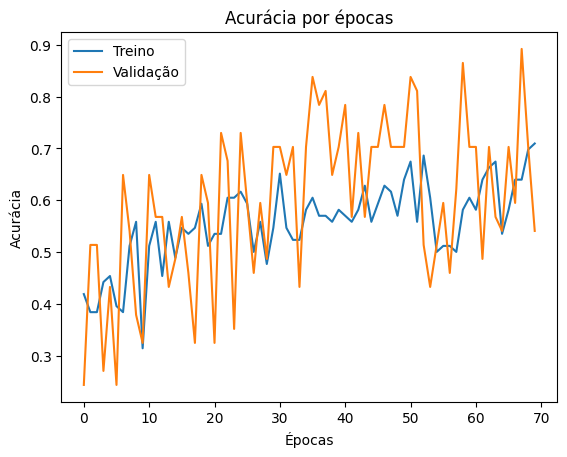

In [ ]:
plt.plot(hist.history['accuracy'])            # Acurácia - precisão de uma tabela ou de uma operação ou proximidade entre o valor obtido experimentalmente e o valor verdadeiro na medição de uma grandeza física.
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')              # Gráfico da acurácia por épocas
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

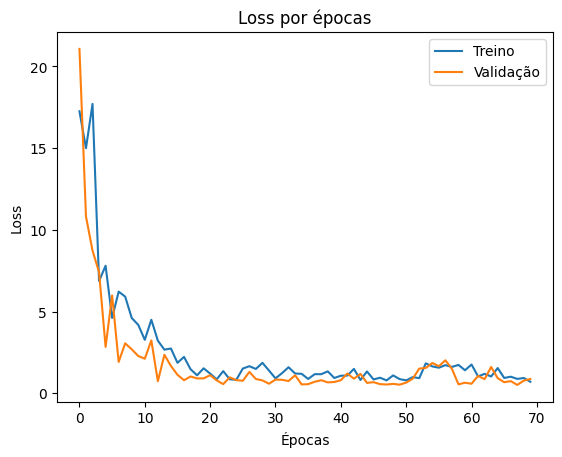

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss por épocas')               # Gráfico das perdas por épocas
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])

In [ ]:
model_json = modelo.to_json()
with open("model.json", "w") as json_file:
   json_file.write(model_json)                      # Salvamento do modelo

modelo.save_weights("model.h5")
print("Modelo Salvo")

Modelo Salvo


In [ ]:
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)     # Carregamento do modelo acima
loaded_model.load_weights("model.h5")
print("Modelo Carregado")

Modelo Carregado


In [ ]:
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
perda_teste, acuracia_teste = loaded_model.evaluate(entradasTest, valoresSaidaTest)   # Carregamento das entradas de teste e valores de testes
print("Perda do teste: ", perda_teste)                                                # print da perde de teste
print("Acurácia do teste: ", acuracia_teste)                                          # print da acurácia de teste
testes=loaded_model.predict(entradasTest)                                             # variável para carregar todas saídas das entradas

2/2 [==============================] - 0s 11ms/step - loss: 0.8576 - accuracy: 0.5926
Perda do teste:  0.8575897216796875
Acurácia do teste:  0.5925925970077515
2/2 [==============================] - 0s 10ms/step


In [ ]:
x=0
for i in testes:
   print(np.argmax(i), valoresSaidaTest[x])
   x=x+1

2 [2]
2 [0]
2 [2]
0 [0]
0 [0]
2 [2]
2 [2]
2 [1]
2 [2]
0 [0]
2 [2]
0 [0]
0 [0]
0 [0]
2 [1]
2 [0]
2 [0]
2 [1]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
0 [0]
2 [2]
2 [2]
2 [1]
2 [1]
2 [1]
2 [1]
2 [1]
2 [2]
1 [1]
0 [0]
2 [2]
2 [1]
0 [0]
0 [0]
2 [1]
2 [1]
2 [1]
1 [1]
2 [2]
2 [2]
0 [0]
2 [1]
2 [2]
2 [1]
2 [1]
2 [0]
2 [1]
1 [1]
0 [0]
2 [0]
